# Note:
Ho fissato la CV value a 5, sebbene di per sè i risultati non siano ottimi: circa 0.66967.
I risultati in validazione migliorano fortemente se:
- Viene utilizzato `StratifiedShuffleSplit(n_splits=5, test_size=0.3)` come CV,
- Vengono normalizzati (Scaling) i dati di input (X_train, X_test).
Con entrambi questi accorgimenti attivi, raggiungiamo una soglia del 87% in validazione e del 85% in test, come potete vedere dalle confusion matrixes sotto (gentilmente offerte dal nostro Pasquale)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [3]:
# Datasets Path
TR_PATH = "./monks/datasets/monks-1.train"
TS_PATH = "./monks/datasets/monks-1.test"

In [4]:
def read_ds(path):
  """
  parse CSV data set and
  returns a tuple (input, target)
  """
  df = pd.read_csv(path, sep=" ", names=['NaN','y','x1','x2','x3','x4','x5','x6','garbage'])
  y, df = df['y'], df.drop(columns=['NaN','garbage','y'])
  
  # One-hot encoding categorical variables
  onehot = OneHotEncoder(sparse_output=False).fit_transform(df) 
  df = pd.DataFrame(onehot, columns=[f'x{i}' for i in range(1, 18)]).astype('int')

  # Data normalization
  scaler = StandardScaler()
  scaler.fit(df)
  df = scaler.transform(df)

  return (df, y)

In [5]:
# read training and test set
X_train, y_train = read_ds(TR_PATH)
X_test,  y_test  = read_ds(TS_PATH)

In [6]:
# Hyperparameter tuning
param_grid = {
            'n_neighbors' : range(1,25), 
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 
            'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski'], 
            'weights' : ['distance', 'uniform'] 
}

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv, n_jobs=-1)
grid.fit(X_train, y_train)
print(
  "The best parameters are %s with a score of %0.5f"
  % (grid.best_params_, grid.best_score_)
)

knn = grid.best_estimator_

The best parameters are {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'} with a score of 0.87368


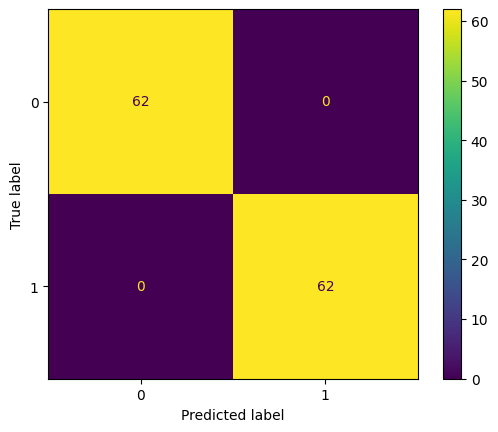

In [7]:
# Tr Confusion Matrix
predictions = knn.predict(X_train)
cm = confusion_matrix(y_train, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

KNN Assessment: 0.8564814814814815


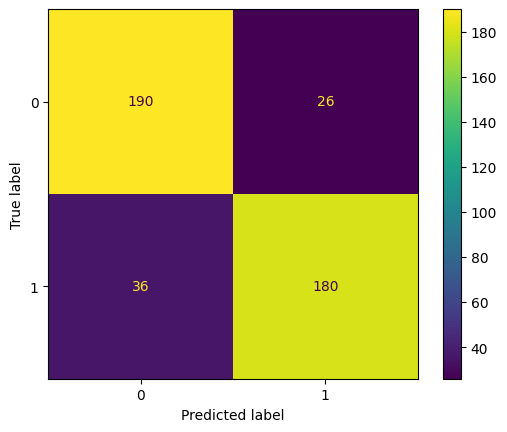

In [9]:
# Test
print("KNN Assessment: " + str(knn.score(X_test, y_test)))

# Ts Confusion Matrix
predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()